In [2]:
import pandas as pd

In [4]:
test = [12,3,4,5]

pd.DataFrame(test)


,0
0,12
1,3
2,4
3,5


In [134]:
import random
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import numpy as np

In [62]:
d1 = random.randrange(1,7)
d2 = random.randrange(1,7)
d3 = random.randrange(1,7)
d4 = random.randrange(1,7)

dices = [d1,d2,d3,d4]
dices = sorted(dices)
dices.remove(dices[0])
soma = sum(dices)


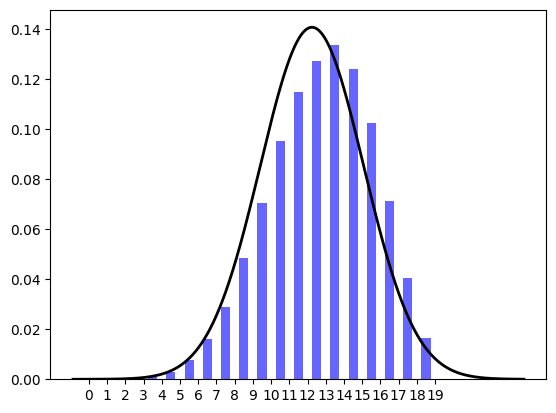

In [211]:
somas = []

for i in range(0,100000):
    
    d1 = random.randrange(1,7)
    d2 = random.randrange(1,7)
    d3 = random.randrange(1,7)
    d4 = random.randrange(1,7)

    dices = [d1,d2,d3,d4]
    dices = sorted(dices)
    dices.remove(dices[0])
    soma = sum(dices)
    
    somas.append(soma)
    
#plt.hist(somas, histtype='stepfilled')

mu, std = norm.fit(somas)

plt.hist(somas, label=[1,2,3], bins=range(0,24), density=True, alpha=0.6, color='b', rwidth=0.5)


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 10000)
p = norm.pdf(x, mu, std)
 
plt.plot(x, p, 'k', linewidth=2)


#title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)




plt.xticks(range(0,20))
plt.show()


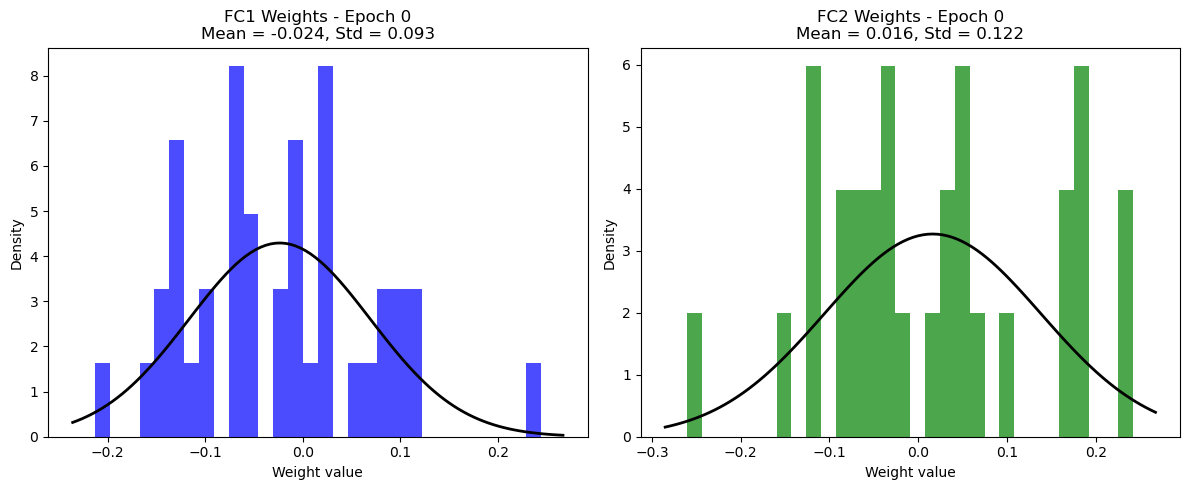

Epoch 0, Loss: 1.1002256870269775
Epoch 50, Loss: 0.26756551861763
Epoch 100, Loss: 0.07925876975059509
Epoch 150, Loss: 0.05684974044561386
Epoch 200, Loss: 0.05273129791021347
Epoch 250, Loss: 0.05128787085413933
Epoch 300, Loss: 0.050704579800367355
Epoch 350, Loss: 0.050447311252355576
Epoch 400, Loss: 0.05032168701291084
Epoch 450, Loss: 0.05025052651762962
Epoch 500, Loss: 0.050200995057821274
Epoch 550, Loss: 0.05016080662608147
Epoch 600, Loss: 0.050126925110816956
Epoch 650, Loss: 0.050096165388822556
Epoch 700, Loss: 0.05006921663880348
Epoch 750, Loss: 0.05004862695932388
Epoch 800, Loss: 0.05003010854125023
Epoch 850, Loss: 0.05001426115632057
Epoch 900, Loss: 0.049999821931123734
Epoch 950, Loss: 0.0499868281185627
Epoch 1000, Loss: 0.04997774213552475
Epoch 1050, Loss: 0.04996836557984352
Epoch 1100, Loss: 0.04995943605899811
Epoch 1150, Loss: 0.04995172098278999
Epoch 1200, Loss: 0.04994448274374008
Epoch 1250, Loss: 0.049937374889850616
Epoch 1300, Loss: 0.0499285571277

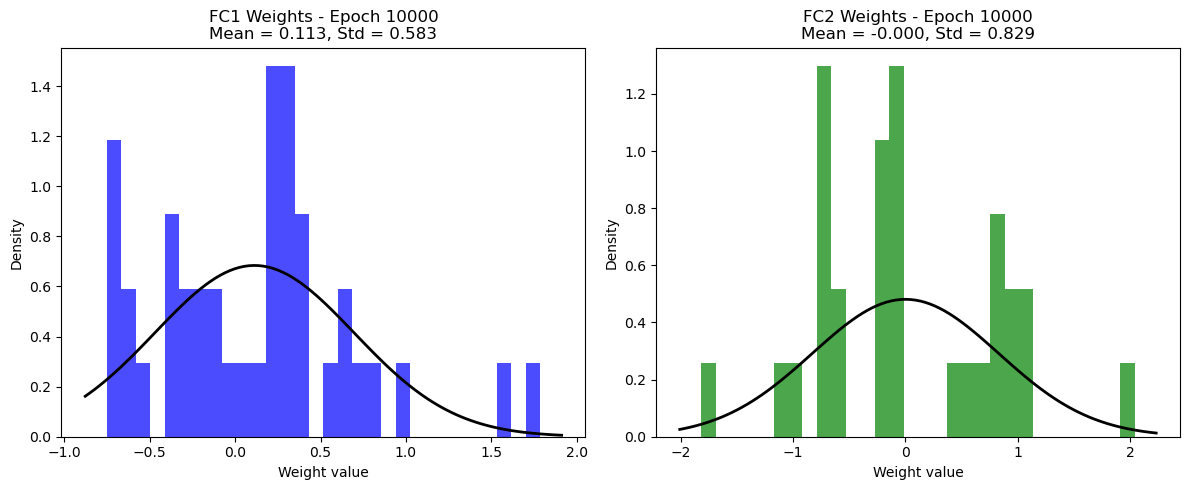

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import norm

# Carregar o dataset IRIS
iris = load_iris()
X, y = iris.data, iris.target

# Padronizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separar dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converter para tensores
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

# Definir o modelo MLP
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(4, 10)  # 4 features -> 10 neurônios ocultos
        self.fc2 = nn.Linear(10, 3)  # 10 neurônios ocultos -> 3 classes de saída

        # Inicializar os pesos com distribuição normal
        nn.init.normal_(self.fc1.weight, mean=0.0, std=0.1)
        nn.init.normal_(self.fc2.weight, mean=0.0, std=0.1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Inicializar o modelo, loss function e otimizador (com regularização L2)
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.001)  # L2 regularization (weight decay)

# Função para plotar histogramas dos pesos e ajustar uma curva normal
def plot_histograms_and_gaussian(model, epoch):
    fc1_weights = model.fc1.weight.detach().numpy().flatten()
    fc2_weights = model.fc2.weight.detach().numpy().flatten()

    plt.figure(figsize=(12, 5))

    # Plot para os pesos da camada fc1
    plt.subplot(1, 2, 1)
    plt.hist(fc1_weights, bins=30, alpha=0.7, color='blue', density=True)
    
    # Ajuste de uma curva normal
    mu1, std1 = norm.fit(fc1_weights)
    xmin1, xmax1 = plt.xlim()
    x1 = np.linspace(xmin1, xmax1, 100)
    p1 = norm.pdf(x1, mu1, std1)
    plt.plot(x1, p1, 'k', linewidth=2)
    
    plt.title(f'FC1 Weights - Epoch {epoch}\nMean = {mu1:.3f}, Std = {std1:.3f}')
    plt.xlabel('Weight value')
    plt.ylabel('Density')

    # Plot para os pesos da camada fc2
    plt.subplot(1, 2, 2)
    plt.hist(fc2_weights, bins=30, alpha=0.7, color='green', density=True)
    
    # Ajuste de uma curva normal
    mu2, std2 = norm.fit(fc2_weights)
    xmin2, xmax2 = plt.xlim()
    x2 = np.linspace(xmin2, xmax2, 100)
    p2 = norm.pdf(x2, mu2, std2)
    plt.plot(x2, p2, 'k', linewidth=2)
    
    plt.title(f'FC2 Weights - Epoch {epoch}\nMean = {mu2:.3f}, Std = {std2:.3f}')
    plt.xlabel('Weight value')
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

# Plotar histogramas antes do treinamento
plot_histograms_and_gaussian(model, epoch=0)

# Treinamento
n_epochs = 10000
for epoch in range(n_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass e otimização
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Plotar histogramas após o treinamento e ajustar a gaussiana
plot_histograms_and_gaussian(model, epoch=n_epochs)
